In [19]:
import matplotlib.pyplot as plt

In [20]:
def fxy(x, y):
    return 13 * pow(y, 12/13)

In [21]:
def sol(x):
    return x ** 13

In [22]:
a = 2
b = 3
h = 10 ** (-1)
x0 = a
y0 = sol(x0)
print(x0, y0)

2 8192


In [23]:
def RungeKutta(x, y, h):
    k1 = h * fxy(x, y)
    k2 = h * fxy(x + h*0.5, y + k1*0.5)
    k3 = h * fxy(x + h*0.5, y + k2*0.5)
    k4 = h * fxy(x + h, y + h*k3)
    x1 = x + h
    y1 = y + (k1 + 2*k2 + 2*k3 + k4)/6
    return x1, y1

In [24]:
def AdamsBashforth(x, y, h):
    xl = []
    yl = []
    ykl = []

    x0, y0 = x, y
    xl.append(x0)
    yl.append(y0)
    
    x1, y1 = RungeKutta(x0, y0, h)
    xl.append(x1)
    yl.append(y1)
    
    x2 = x1 + h
    y2 = y1 + (h/2) * (3*fxy(x1, y1) - fxy(x0, y0))
    xl.append(x2)
    yl.append(y2)
    
    yk1 = y0 + (h/2)*(fxy(x1, y1) + fxy(x0, y0))
    yk2 = y1 + (h/2)*(fxy(x2, y2) + fxy(x1, y1))
    ykl.append(y0)
    ykl.append(yk1)
    ykl.append(yk2)
    
    while x2 <= b:
        x0, y0 = x1, y1
        x1, y1 = x2, y2
        x2 = x1 + h
        y2 = y1 + (h/2) * (3*fxy(x1, y1) - fxy(x0, y0))
        yk2 = y1 + (h/2)*(fxy(x2, y2) + fxy(x1, y1))
        xl.append(x2)
        yl.append(y2)
        ykl.append(yk2)
    return xl, yl, ykl

In [25]:
X, Y, YK = AdamsBashforth(x0, y0, h)
print(X, Y, YK, sep='\n')

[2, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5000000000000004, 2.6000000000000005, 2.7000000000000006, 2.8000000000000007, 2.900000000000001, 3.000000000000001]
[8192, 14797.345420101105, 25920.843171400567, 44455.3645430466, 74801.68896496667, 123638.16941584178, 200963.36481111948, 321538.6598797761, 506869.5487440096, 787897.9894239604, 1208623.1180266682]
[8192, 15449.699250433157, 27102.584877893987, 46316.20492185356, 77648.08675079599, 127919.82164960074, 207311.04379869794, 330823.0509163682, 520278.3317629205, 807033.962465944, 1235627.7274392503]


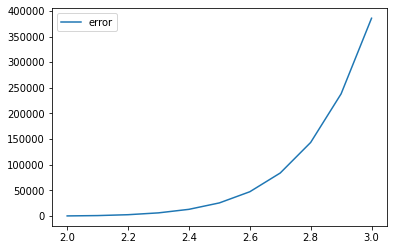

In [26]:
eps = []
for i in range (len(Y)):
    eps.append(abs(sol(X[i]) - Y[i]))
plt.plot(X, eps)
plt.legend(['error'])
plt.show()

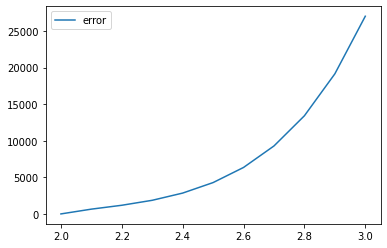

In [27]:
epsl = []
for i in range (len(Y)):
    epsl.append(abs(YK[i] - Y[i]))
plt.plot(X, epsl)
plt.legend(['error'])
plt.show()